In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

from collections import Counter
import warnings 
warnings.filterwarnings('ignore')


In [3]:
os.getcwd()

'C:\\Users\\ankit'

In [4]:
os.chdir("D:\Datasets")

In [5]:
os.getcwd()

'D:\\Datasets'

In [6]:
df= pd.read_csv("D:\\Datasets\\chess.csv")

In [7]:
df

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976.0,GM,2675,2646.0,2736.0,wi
1,8602980,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0,NaN
2,5008123,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0,NaN
3,4147103,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0,NaN
4,700088,"Polgar, Susan",HUN,F,1969.0,GM,2577,NaN,NaN,wi
...,...,...,...,...,...,...,...,...,...,...
8548,3302288,"Reinkens, Natalia",BOL,F,NaN,NaN,1801,NaN,NaN,wi
8549,343960,"Saffova, Michaela",CZE,F,1994.0,NaN,1801,1791.0,1765.0,NaN
8550,5038294,"Shetye, Siddhali",IND,F,1992.0,NaN,1801,1884.0,1824.0,wi
8551,2072491,"Trakru, Priya",USA,F,2001.0,WFM,1801,NaN,NaN,wi


In [8]:
df['Inactive_flag'].fillna('active',inplace=True)

In [9]:
data=df[df['Inactive_flag']=='active']

In [10]:
data.columns

Index(['Fide id', 'Name', 'Federation', 'Gender', 'Year_of_birth', 'Title',
       'Standard_Rating', 'Rapid_rating', 'Blitz_rating', 'Inactive_flag'],
      dtype='object')

***Type of Columns-
Categorical:(Title,Inactive_flag,Gender,Federation)
Numerical Variable:(Fide id,Year_of_birth,Standard_Rating,Rapid_rating,Blitz_rating )***

In [11]:
data.describe()

,Fide id,Year_of_birth,Standard_Rating,Rapid_rating,Blitz_rating
count,2.701000e+03,2690.000000,2701.000000,2091.000000,2046.000000
mean,1.008719e+07,1990.520818,2015.577194,1927.388331,1924.102639
std,1.079450e+07,13.664651,160.718363,213.518058,207.279272
min,1.005360e+05,1936.000000,1801.000000,1224.000000,1159.000000
25%,1.607340e+06,1984.000000,1882.000000,1784.000000,1787.250000
50%,4.902785e+06,1995.000000,1984.000000,1920.000000,1918.500000
75%,1.413705e+07,2001.000000,2108.000000,2068.000000,2060.000000
max,7.300697e+07,2010.000000,2658.000000,2621.000000,2608.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 1 to 8549
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fide id          2701 non-null   int64  
 1   Name             2701 non-null   object 
 2   Federation       2701 non-null   object 
 3   Gender           2701 non-null   object 
 4   Year_of_birth    2690 non-null   float64
 5   Title            1424 non-null   object 
 6   Standard_Rating  2701 non-null   int64  
 7   Rapid_rating     2091 non-null   float64
 8   Blitz_rating     2046 non-null   float64
 9   Inactive_flag    2701 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 232.1+ KB


In [14]:
data.head()

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
1,8602980,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0,active
2,5008123,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0,active
3,4147103,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0,active
6,8603006,"Ju, Wenjun",CHN,F,1991.0,GM,2560,2610.0,2536.0,active
7,14109336,"Lagno, Kateryna",RUS,F,1989.0,GM,2546,2521.0,2608.0,active


In [15]:
## Categorical Variable 
def bar_plot(variable):
    # get feature
    var=data[variable]
    # count number of categorical variable
    var_value=var.value_counts()
    # visualization
    plt.figure(figsize=(15,3))
    plt.bar(var_value.index,var_value)
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show('{}:\n {}:'.format(variable,var_value))

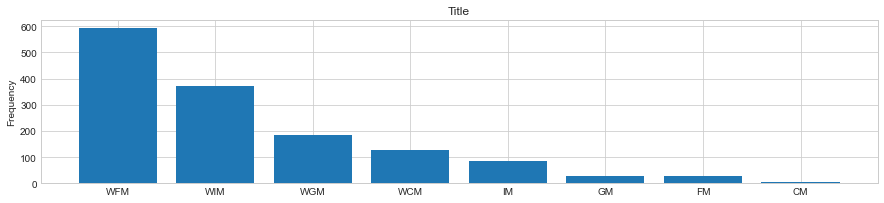

In [16]:
category1=['Title']
for c in category1 :
    bar_plot(c)

In [17]:
category2=['Title','Federation']
for i in category2:
    print('{} \n '.format(data[i].value_counts()))

WFM    593
WIM    373
WGM    185
WCM    127
IM      85
GM      28
FM      27
CM       6
Name: Title, dtype: int64 
 
RUS    319
GER    248
POL    125
ESP    117
IND    110
      ... 
KOR      1
TTO      1
HON      1
ZAM      1
BER      1
Name: Federation, Length: 112, dtype: int64 
 


**Numerical Data**

In [18]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist'.format(variable))
    plt.show()

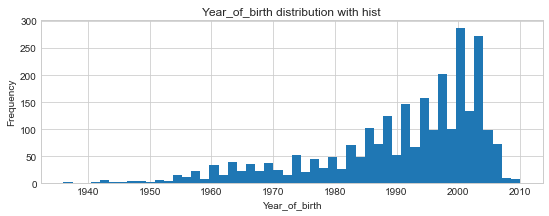

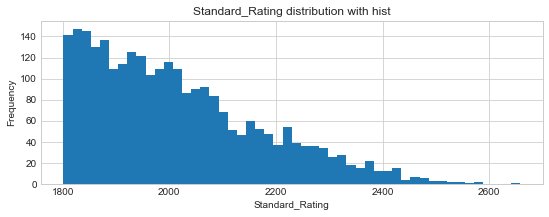

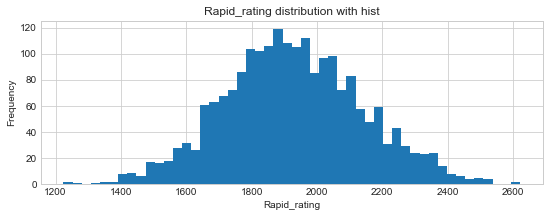

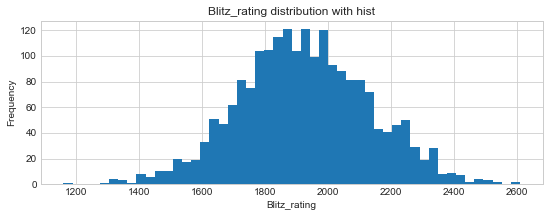

In [19]:
num_variable=['Year_of_birth','Standard_Rating','Rapid_rating','Blitz_rating']
for i in num_variable:
    plot_hist(i)

In [20]:
# free data analysis 
data[(data['Year_of_birth']>2000)&(data['Rapid_rating']>2300)]

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
35,8608059,"Zhu, Jiner",CHN,F,2002.0,WGM,2459,2326.0,2249.0,active
38,24171760,"Shuvalova, Polina",RUS,F,2001.0,WGM,2454,2379.0,2319.0,active
76,13308130,"Sargsyan, Anna M.",ARM,F,2001.0,WGM,2402,2304.0,2263.0,active
104,13708694,"Assaubayeva, Bibisara",KAZ,F,2004.0,FM,2378,2321.0,2232.0,active
342,24174041,"Maltsevskaya, Aleksandra",RUS,F,2002.0,WGM,2272,2356.0,2295.0,active


In [21]:
data[(data['Year_of_birth']<1970)&(data['Rapid_rating']>2300)]

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
33,1700030,"Cramling, Pia",SWE,F,1963.0,GM,2464,2396.0,2320.0,active
102,4119827,"Matveeva, Svetlana",RUS,F,1969.0,IM,2380,2338.0,2231.0,active
183,4000510,"Berend, Elvira",LUX,F,1965.0,WGM,2326,2326.0,2340.0,active
203,4671660,"Schleining, Zoya",GER,F,1961.0,IM,2320,2340.0,NaN,active
333,2802015,"Klinova, Masha",ISR,F,1968.0,IM,2275,2301.0,2274.0,active


In [22]:
data.Name[data['Blitz_rating']==data['Blitz_rating'].max()]

7    Lagno, Kateryna
Name: Name, dtype: object

In [23]:
data.Name[data['Standard_Rating']==data['Standard_Rating'].max()]

1    Hou, Yifan
Name: Name, dtype: object

In [24]:
data['Name'][data['Rapid_rating']==data['Rapid_rating'].max()]

1    Hou, Yifan
Name: Name, dtype: object

In [25]:
data[data['Year_of_birth']==data['Year_of_birth'].max()]

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
481,8618020,"Lu, Miaoyi",CHN,F,2010.0,NaN,2244,1403.0,1545.0,active
5439,30929849,"Li, Rachael",USA,F,2010.0,WCM,1939,NaN,NaN,active


In [26]:
# groupby
data.groupby('Title').Standard_Rating.mean()

Title
CM     2002.500000
FM     2204.185185
GM     2469.821429
IM     2362.764706
WCM    1915.267717
WFM    2030.733558
WGM    2248.794595
WIM    2120.632708
Name: Standard_Rating, dtype: float64

**CM= Candidate Master
FM= Fide Master
GM= Grand Master
IM= International Master
W prefix is for women***

In [27]:
data.groupby('Title').Blitz_rating.mean()

Title
CM     1827.200000
FM     2018.370370
GM     2396.321429
IM     2262.782051
WCM    1750.112150
WFM    1917.734694
WGM    2184.904192
WIM    2031.977636
Name: Blitz_rating, dtype: float64

In [28]:
data.groupby('Title').Rapid_rating.mean()

Title
CM     1821.600000
FM     2024.846154
GM     2436.037037
IM     2302.417722
WCM    1763.544554
WFM    1928.703782
WGM    2205.515152
WIM    2049.698361
Name: Rapid_rating, dtype: float64

In [29]:
# defining column using other columns
data['total_rating']=(data['Standard_Rating']+data['Rapid_rating']+data['Blitz_rating'])/3
data.head()
data.Name[data['total_rating']==data['total_rating'].max()]

1    Hou, Yifan
Name: Name, dtype: object